Mario Peñas - Prueba Empresa Anónima
Prueba realizada para una empresa, la cual dejo en el anonimato.
Se me dieron dos días para realizar la prueba de 4M de datos sin ninguna explicación de los datos, con el objetivo de sacar un análisis EDA y una segmentación con modelos no supervisados.

# Consideraciones previas

He acotado el tiempo para no hacer el ejercicio infinito.

Después de un mini análisis, he decidido que haré estandarización y las categóricas las convertiré con OHE.

Utilizaré minibatch Kmeans, para ahorrar el tiempo de ejecución.

Por último, he decidido reducir el dataset final, porque he visto que podría alargarse mucho, y dado que no tengo los recursos en casa para tratar con tal cantidad de datos, lo he reducido a un tiempo de 1 mes.

# Importaciones

Pandas, numpy y matplotlib para tratar con los datos y visualizaciones


OHE para la transformación de variables y, MinMaxScaler para la estandarización

MiniBartchKmeans para el algoritmo no supervisado.


Y las tres métricas que uso para los no supervisados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
%matplotlib inline
pd.set_option('display.float_format', '{:.4f}'.format)

In [291]:
path='C:/Users/110927/Desktop/EstructuraDirectorio/03_MACHINE_LEARNING/CASOS/PruebaPlaneta/datasets/'

In [280]:
archivo_original='Dataset_Ecommerce.csv'

SQL:

LOAD DATA INFILE 'Dataset_Ecommerce.csv'

INTO TABLE df

In [281]:
df=pd.read_csv(path+archivo_original)

C:\Users\110927\AppData\Local\Temp\ipykernel_32032\3582430434.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+archivo_original)


Parece que hay bastantes nulos, pero por lo que parece es ausencia de esos datos, por lo que los rellenaré con 0s.

# Primer Análisis

In [75]:
df

,fullVisitorId,visitNumber,visitId,visitStartTime,date,transactionRevenue,visits,hits,bounces,transactions,campaign,source,medium,channelGrouping,socialEngagementType
0,1897069477319653626,1,1472335420,1472335420,20160827,NaN,1,1,1.0000,NaN,(not set),google,organic,Organic Search,Not Socially Engaged
1,770977266919252794,1,1472313115,1472313115,20160827,NaN,1,1,1.0000,NaN,(not set),google,organic,Organic Search,Not Socially Engaged
2,5388987938103983645,2,1472327435,1472327435,20160827,NaN,1,1,1.0000,NaN,AW - Dynamic Search Ads Whole Site,google,cpc,Paid Search,Not Socially Engaged
3,828910289597203555,1,1472293553,1472293553,20160827,NaN,1,1,1.0000,NaN,(not set),google,organic,Organic Search,Not Socially Engaged
4,1307091095763777808,1,1472282667,1472282667,20160827,NaN,1,1,1.0000,NaN,(not set),baidu,organic,Organic Search,Not Socially Engaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153670,7404995807935744993,1,1480091078,1480091078,20161125,NaN,1,1,1.0000,NaN,(not set),(direct),(none),Organic Search,Not Socially Engaged
4153671,2460067330611103854,1,1480132983,1480132983,20161125,NaN,1,1,1.0000,NaN,(not set),(direct),(none),Organic Search,Not Socially Engaged
4153672,5482354686549426627,1,1480111199,1480111199,20161125,NaN,1,1,1.0000,NaN,(not set),(direct),(none),Organic Search,Not Socially Engaged
4153673,2873302188037880976,1,1480082964,1480082964,20161125,NaN,1,1,1.0000,NaN,(not set),(direct),(none),Direct,Not Socially Engaged


Hay una fecha en modo integer, que habr´á que convertir a datetime, y un starttime, que no parece tener un sentido lógico, ya que concuerda claramente con el visitId. Podría investigar si este integer es un o una hora, pero he decidido no seguir invirtiendo tiempo en ello, por lo que las eliminaré del dataset.

Hay bastantes duplicados, los elimino.

In [76]:
df.duplicated().sum()

3191126

In [339]:
df=df.drop_duplicates()

SQL:

SELECT DISTINCT *

INTO nueva_tabla_sin_duplicados

FROM tu_tabla;

Pongo la fecha en formato DateTime, usando una lambda que es muy cómodo

In [ ]:
df['DateTime'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

Pongo la fecha como indice para aprovechar las mejoras que esto nos da

In [344]:
df.set_index('DateTime', inplace=True)

In [345]:
df=df.sort_index().drop(columns='date', axis=1)

SELECT *

FROM tu_tabla

ORDER BY DateTime;



In [346]:
nombre_fichero_trabajo = 'trabajo1.csv'

ruta_completa = path + nombre_fichero_trabajo

df.to_csv(ruta_completa)

In [10]:
df=pd.read_csv(path+ 'trabajo1.csv').set_index('DateTime')

C:\Users\110927\AppData\Local\Temp\ipykernel_21416\3525673997.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+ 'trabajo1.csv').set_index('DateTime')


In [11]:
df.info(null_counts=True)

C:\Users\110927\AppData\Local\Temp\ipykernel_21416\1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Index: 962549 entries, 2016-08-01 to 2017-08-01
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fullVisitorId         962549 non-null  object 
 1   visitNumber           962549 non-null  int64  
 2   visitId               962549 non-null  int64  
 3   visitStartTime        962549 non-null  int64  
 4   transactionRevenue    11959 non-null   float64
 5   visits                962549 non-null  int64  
 6   hits                  962549 non-null  int64  
 7   bounces               450879 non-null  float64
 8   transactions          25062 non-null   float64
 9   campaign              962549 non-null  object 
 10  source                962549 non-null  object 
 11  medium                962549 non-null  object 
 12  channelGrouping       962549 non-null  object 
 13  socialEngagementType  962549 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory us

## Valores únicos

Hay tres variables que son constantes, las cuales serán eliminadas.

In [12]:
df.nunique().sort_values()

visits                       1
bounces                      1
socialEngagementType         1
medium                       7
campaign                     8
channelGrouping              8
transactions                13
hits                       274
source                     275
visitNumber                384
transactionRevenue        6378
fullVisitorId           724545
visitId                 886303
visitStartTime          887159
dtype: int64

In [13]:
df.drop(['visits', 'socialEngagementType', 'visitStartTime'], axis=1, inplace=True)

ALTER TABLE df

DROP COLUMN visits,
           socialEngagementType,
           visitStartTime;

Separo las categóricas de las numéricas, para trabajar más cómodamente con los gráficos y transformaciones.

In [14]:
cat = df.select_dtypes(exclude = 'number').copy()

In [282]:
num = df.select_dtypes(include='number').copy()

# Analisis CATEGÓRICAS

## Reviso los nulos

In [16]:
cat.isna().sum().sort_values(ascending = False)

fullVisitorId      0
campaign           0
source             0
medium             0
channelGrouping    0
dtype: int64

## Los conteos

In [17]:
cat.campaign.value_counts()

(not set)                             932408
Data Share Promo                       17325
AW - Dynamic Search Ads Whole Site      6848
AW - Accessories                        5845
AW - Electronics                          84
AW - Apparel                              34
All Products                               4
Data Share                                 1
Name: campaign, dtype: int64

In [ ]:
SELECT campaign, COUNT(*) AS countCampaign
FROM cat
GROUP BY campaign;

In [18]:
cat.campaign.value_counts(normalize=True)

(not set)                            0.9687
Data Share Promo                     0.0180
AW - Dynamic Search Ads Whole Site   0.0071
AW - Accessories                     0.0061
AW - Electronics                     0.0001
AW - Apparel                         0.0000
All Products                         0.0000
Data Share                           0.0000
Name: campaign, dtype: float64

In [19]:
cat.source.value_counts(normalize=True)

(direct)                   0.4191
google                     0.2685
youtube.com                0.2262
Partners                   0.0180
analytics.google.com       0.0176
                            ...  
takeout.google.com         0.0000
search.pch.com             0.0000
mobile.facebook.com        0.0000
nl.yhs4.search.yahoo.com   0.0000
earth.google.com           0.0000
Name: source, Length: 275, dtype: float64

Hay demasiados valores para esta variable por los que los voy a agrupar mediante la siguiente función. Todos aquellos con menos del 5% de aparición se irán a la categoría 'OTROS'.

## Agrupo las categorias menos frecuentes:

In [20]:
def agrupar_cat_raras(variable, criterio = 0.05):
    #Calcula las frecuencias
    frecuencias = variable.value_counts(normalize=True)
    #Identifica las que están por debajo del criterio
    temp = [cada for cada in frecuencias.loc[frecuencias < criterio].index.values]
    #Las recodifica en 'OTROS'
    temp2 = np.where(variable.isin(temp),'OTROS',variable)
    #Devuelve el resultado
    return(temp2)

for variable in cat[['campaign','source','medium','channelGrouping']]:
    cat[variable] = agrupar_cat_raras(cat[variable],criterio = 0.05)

In [21]:
cat.source.value_counts(normalize=True)

(direct)      0.4191
google        0.2685
youtube.com   0.2262
OTROS         0.0863
Name: source, dtype: float64

In [22]:
cat.medium.value_counts()

(none)      403399
referral    270080
organic     250558
OTROS        38512
Name: medium, dtype: int64

In [23]:
cat.channelGrouping.value_counts()

Organic Search    406466
Social            232016
Direct            153189
Referral          119033
OTROS              51845
Name: channelGrouping, dtype: int64

In [24]:
cat.campaign.value_counts(normalize=True)

(not set)   0.9687
OTROS       0.0313
Name: campaign, dtype: float64

Tras el análisis borraremos la variable campaign, ya que parece que no aporta mucha info.

In [26]:
cat.drop(columns='campaign', inplace=True)

#   Análisis: NUMÉRICAS

## Nulos

In [27]:
num.isna().sum().sort_values(ascending = False)

transactionRevenue    950590
transactions          937487
bounces               511670
visitNumber                0
visitId                    0
hits                       0
dtype: int64

In [28]:
num['transactionRevenue'].fillna(0, inplace=True)

In [29]:
num.isna().sum().sort_values(ascending = False)

transactions          937487
bounces               511670
visitNumber                0
visitId                    0
transactionRevenue         0
hits                       0
dtype: int64

In [30]:
num['transactions'].fillna(0, inplace=True)

In [31]:
num['bounces'].fillna(0, inplace=True)

In [32]:
num.isna().sum().sort_values(ascending = False)

visitNumber           0
visitId               0
transactionRevenue    0
hits                  0
bounces               0
transactions          0
dtype: int64

## Atípicos

Saco un describe de los registros con transacciones con compra para analizar los valores de esta variable.

In [285]:
num[num['transactionRevenue']>0].describe()

,visitNumber,visitId,visitStartTime,date,transactionRevenue,visits,hits,bounces,transactions
count,12073.0000,12073.0000,12073.0000,12073.0000,12073.0000,12073.0000,12073.0000,0.0000,12073.0000
mean,4.2765,1485820253.5037,1485820258.2005,20166210.4021,147670192.1643,1.0000,41.0946,NaN,1.2461
std,13.8227,9308229.6211,9308230.4039,4688.7736,549554279.9612,0.0000,47.7585,NaN,1.6292
min,1.0000,1470046365.0000,1470046365.0000,20160801.0000,1200000.0000,1.0000,2.0000,NaN,1.0000
25%,1.0000,1477954834.0000,1477954834.0000,20161031.0000,29990000.0000,1.0000,19.0000,NaN,1.0000
50%,2.0000,1485559969.0000,1485559969.0000,20170127.0000,55910000.0000,1.0000,29.0000,NaN,1.0000
75%,4.0000,1493912060.0000,1493912060.0000,20170504.0000,114980000.0000,1.0000,46.0000,NaN,1.0000
max,315.0000,1501651868.0000,1501651868.0000,20170801.0000,23952560000.0000,1.0000,500.0000,NaN,25.0000


Aunque trasactionRevenue tiene valores muy altos no puedo decir que sean atípicos. Habría que consultarlo con negocio, para saber si estos valores son valores habituales.

## Agrupo por 'fullVisitorId'

Esto podría reducir mucho el dataset y pasar a nalizarlo por usuario en vez de por visita. Es un análisis diferente. Lo suyo sería hacer un análisis independiente para cada uno. 

In [33]:
df=pd.concat([num,cat], axis=1).reset_index()

In [43]:
df['DateTime']=pd.to_datetime(df['DateTime'])

Verificamos si el visitNumber es un contador para cada fullVisitorId


In [ ]:
df[df['fullVisitorId']=='9308310352918219134'].sort_values(by='visitNumber')

Parece que visitNumber es un contador, por lo que voy a agregar el dataset por usuario= fullVisitorId. 

Y sacaré la mediana de todas las fechas de transacciones, la suma total de las transacciones, hits y bounces. 

Para las categóricas usaré la moda.

In [61]:
df_fv=df.groupby('fullVisitorId').agg({'DateTime':'median',
                                       'source':lambda x: x.mode().iloc[0] if not x.empty else None,
                                     'medium':lambda x: x.mode().iloc[0] if not x.empty else None,
                                     'channelGrouping':lambda x: x.mode().iloc[0] if not x.empty else None,
                                     'visitNumber':'max',
                                'transactionRevenue':'sum',
                                'hits':'sum',
                                'bounces':'sum',
                                'transactions':'sum'})

He tenido que usar lambdas para las categóricas porque la moda no se puede usar dentro de la agregación.

Lo mejor sería sacar la fecha en la que se produjo la maxima transacción, pero debido a falta de tiempo he dejarlo de esta forma más simple. Sacando la fecha mediana.

In [73]:
df_fv.set_index('DateTime', inplace=True)

Hago un análisis con un describe. Y verifico que los datos están correctamente.

A primera vista, parece que hay muy pocas transacciones con beneficio.

In [77]:
df_fv.describe().T

,count,mean,std,min,25%,50%,75%,max
visitNumber,724545.0000,1.3542,2.3260,1.0000,1.0000,1.0000,1.0000,395.0000
transactionRevenue,724545.0000,2449973.0590,165248866.6068,0.0000,0.0000,0.0000,0.0000,124741780000.0000
hits,724545.0000,7.0621,30.9310,1.0000,1.0000,2.0000,5.0000,8018.0000
bounces,724545.0000,0.6223,0.8656,0.0000,0.0000,1.0000,1.0000,149.0000
transactions,724545.0000,0.0384,0.7783,0.0000,0.0000,0.0000,0.0000,378.0000


In [78]:
nombre_fichero_trabajo = 'df_fv.csv'

ruta_completa = path  + nombre_fichero_trabajo

#df_fv.to_csv(ruta_completa)

In [238]:
df_fv=pd.read_csv(path+ 'df_fv.csv')

C:\Users\110927\AppData\Local\Temp\ipykernel_32032\1552789968.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fv=pd.read_csv(path+ 'df_fv.csv')


In [239]:
df_fv.set_index('DateTime', inplace=True)

# EDA: categóricas

Con la siguiente fórmula voy a sacar los gráficos de las categóricas de forma automática.

He decidido también comparar cómo se comportan las variables categóricas cuando hay una venta y cuando no. Dado que transactionRevenue parece la variable más importante del dataset.

In [7]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

Saco los registros en los que ha habido ventas y saco los gráficos para las categóricas.

In [8]:
cat_fv=df_fv[df_fv['transactionRevenue']>0].select_dtypes(include='O').copy()

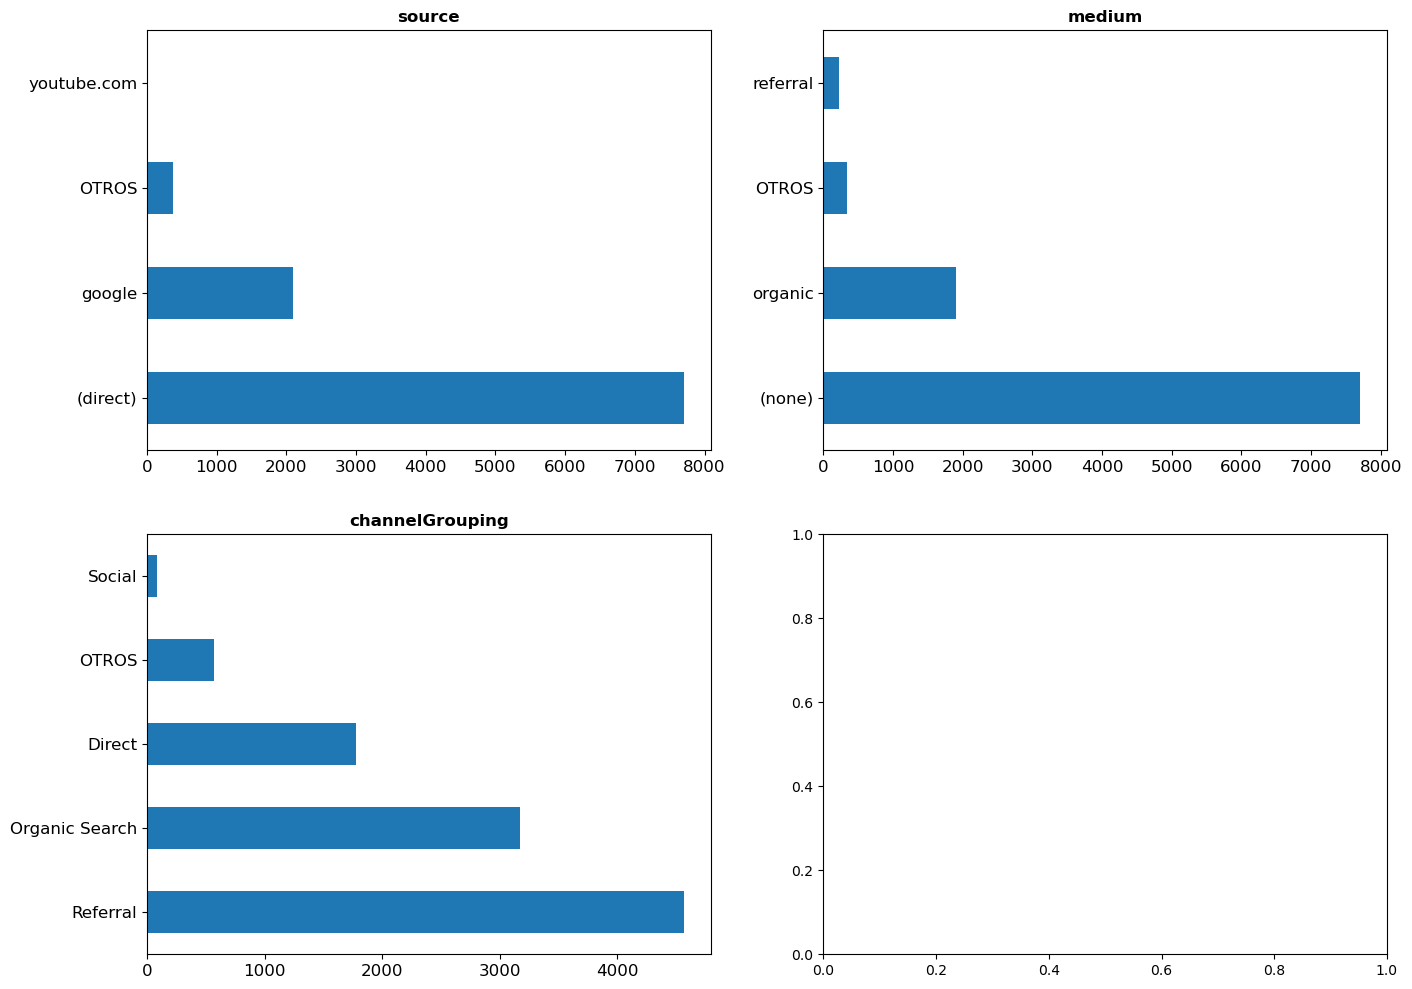

In [9]:
graficos_eda_categoricos(cat_fv[['source', 'medium', 'channelGrouping']])

Aquí hago lo mismo pero para todos aquellos registros sin ventas.

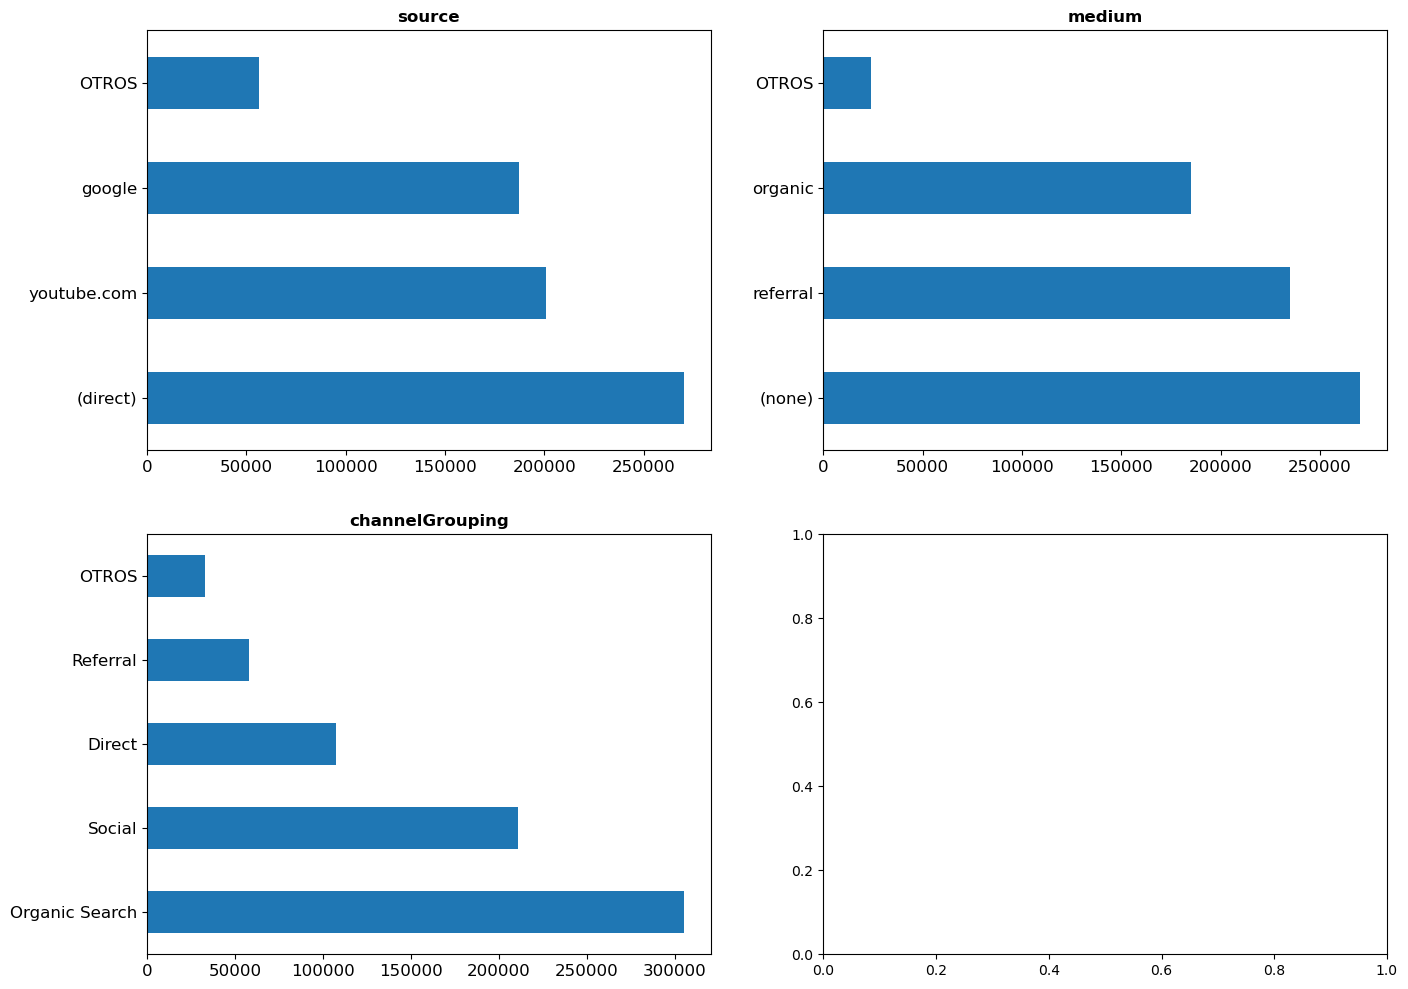

In [13]:
graficos_eda_categoricos(df_fv[df_fv['transactionRevenue']==0][['source', 'medium', 'channelGrouping']])

Parece que a simple vista todas aquellas visitas con compra llegan a traves de busqueda directa. De forma muy destacada. Esto podría decirnos que nuestros clientes no llegan a través de búsquedas de terceros y se podría bajar el presupuesto de anuncios google, por ejemplo.

num## EDA: Numéricas

In [22]:

df_fv.index = pd.to_datetime(df_fv.index)
num_dias=df_fv.resample('D').sum()

C:\Users\110927\AppData\Local\Temp\ipykernel_32032\4089886057.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  num_dias=df_fv.resample('D').sum()


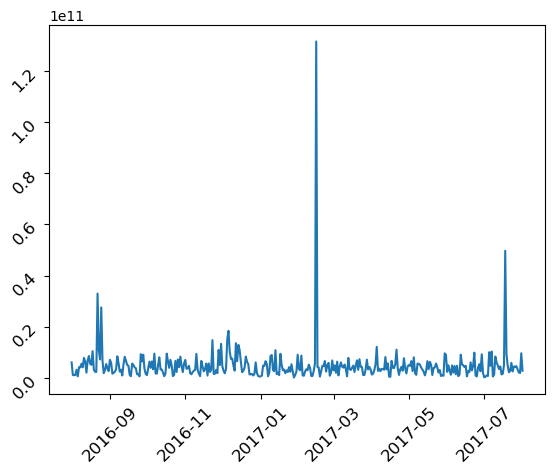

In [24]:
plt.plot(num_dias.index, num_dias.transactionRevenue)
plt.tick_params(labelsize = 12, labelrotation=45)

C:\Users\110927\AppData\Local\Temp\ipykernel_32032\3582755948.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  num_sem=df_fv.resample('W').sum()


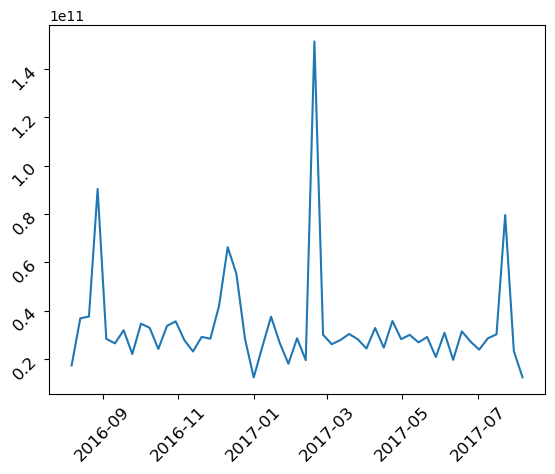

In [29]:

num_sem=df_fv.resample('W').sum()
plt.plot(num_sem.index, num_sem.transactionRevenue)
plt.tick_params(labelsize = 12, labelrotation=45)

Parece que tenemos una serie más o menos estable, salvo 3 o 4 picos que sobresalente significativamente. Habría que revisarlo más en profundidad.

In [86]:
df1.reset_index(inplace=True)

# Transformación de variables

Ahora toca transformar las variables categóricas a numéricas.

Utilizaré OHE.

También pasaré la fecha a variables. Sacando los días que son fin de semana.

In [240]:
df_fv.reset_index(inplace=True)

## Transformo la fecha

In [241]:
df_fv['DateTime']=pd.to_datetime(df_fv.DateTime)
df_fv['year']=df_fv.DateTime.dt.year
df_fv['month']=df_fv.DateTime.dt.month
df_fv['weekday'] = df_fv.DateTime.dt.weekday
df_fv['weekend'] = df_fv['weekday'].isin([5, 6]).astype(int)


## OHE

In [242]:
var_ohe = ['source','medium','channelGrouping']
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')
cat_ohe = ohe.fit_transform(df_fv[var_ohe])
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out())

C:\Users\110927\AppData\Local\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [243]:
df_fv.reset_index(inplace=True)

## Estandarización con Min Max Scaler

In [244]:
var_mms = df_fv[['visitNumber',
                    'transactionRevenue' ,
                    'hits' ,
                     'bounces' ,
                    'transactions',
                    'year',
                    'month',
                    'weekday']].columns
mms = MinMaxScaler()
df_mms = mms.fit_transform(df_fv[var_mms])
#Añadir sufijos a los nombres
nombres_mms = [variable + '_mms' for variable in var_mms]

#Guardar como dataframe
df_mms = pd.DataFrame(df_mms,columns = nombres_mms)

In [245]:
 df_final=pd.concat([df_fv, cat_ohe, df_mms], axis=1)

##  Eliminamos todas las variables previas:

Las categóricas originales y las numéricas originales, sin estandarizar con min max.

In [248]:
df_final.drop(columns=['DateTime','source','medium','channelGrouping',
                       'fullVisitorId','year_mms','month_mms',
                       'weekday','index','transactionRevenue','hits',
                      'visitNumber','transactions', 'bounces'], inplace=True)

In [250]:
nombre_fichero_trabajo = 'df_final.csv'

ruta_completa = path  + nombre_fichero_trabajo

#df_final.to_csv(ruta_completa)

In [ ]:
df_final=pd.read_csv(path+ 'df_final.csv')

# CLUSTER CON MINI BATCH KMEANS

Como he mencionado antes lo voy a realizar con una parte del dataset, en este caso, con los meses de marzo, abril y mayo.

In [251]:
df_final=df_final[(df_final['month']==4)]

Después de poner el mes en 4, esta variable y el año quedan como constantes por lo que las elimino.

In [253]:
df_final.drop(columns=[ 'month', 'year'], inplace=True)

C:\Users\110927\AppData\Local\Temp\ipykernel_32032\3315464523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=[ 'month', 'year'], inplace=True)


## Selección del mejor modelo

El número de segmentos será entre 3,4 o 5

In [264]:
min_k = 3
max_k = 6

soluciones = list(range(min_k,max_k))

Uso la silueta calinski, y davies para medir que partición es mejor.

In [265]:

silueta = []
calins = []
davies = []

Lo hago dentro de un for, y voy añadiendo las metricas a las listas anteriores

In [266]:
for solucion in soluciones:
    
    #Instanciar
    cluster = MiniBatchKMeans(n_clusters = solucion, n_init=10, verbose=3)
    
    #Entrenar
    cluster.fit(df_final)
    
    #Recoger las métricas

    silueta.append(silhouette_score(df_final, cluster.labels_))
    calins.append(calinski_harabasz_score(df_final, cluster.labels_))
    davies.append(davies_bouldin_score(df_final, cluster.labels_))

C:\Users\110927\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Init 1/10 with method k-means++
Inertia for init 1/10: 7219.329591419834
Init 2/10 with method k-means++
Inertia for init 2/10: 8067.078131653415
Init 3/10 with method k-means++
Inertia for init 3/10: 8080.217148964679
Init 4/10 with method k-means++
Inertia for init 4/10: 8202.876826381416
Init 5/10 with method k-means++
Inertia for init 5/10: 9816.165614895146
Init 6/10 with method k-means++
Inertia for init 6/10: 6639.261063783338
Init 7/10 with method k-means++
Inertia for init 7/10: 8836.457807331872
Init 8/10 with method k-means++
Inertia for init 8/10: 7853.439468768636
Init 9/10 with method k-means++
Inertia for init 9/10: 9020.374497480687
Init 10/10 with method k-means++
Inertia for init 10/10: 7254.217148964678
Minibatch step 1/5186: mean batch inertia: 2.1725006324871523
Minibatch step 2/5186: mean batch inertia: 1.5544409925901301, ewa inertia: 1.5544409925901301
Minibatch step 3/5186: mean batch inertia: 1.5015330673723075, ewa inertia: 1.5524006312214318
Minibatch step 4

C:\Users\110927\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Init 1/10 with method k-means++
Inertia for init 1/10: 7000.6890831721985
Init 2/10 with method k-means++
Inertia for init 2/10: 5415.229566656979
Init 3/10 with method k-means++
Inertia for init 3/10: 4976.613448919916
Init 4/10 with method k-means++
Inertia for init 4/10: 7807.615913908754
Init 5/10 with method k-means++
Inertia for init 5/10: 10184.170148678393
Init 6/10 with method k-means++
Inertia for init 6/10: 6936.93632950781
Init 7/10 with method k-means++
Inertia for init 7/10: 6910.086733719041
Init 8/10 with method k-means++
Inertia for init 8/10: 6198.24403037241
Init 9/10 with method k-means++
Inertia for init 9/10: 6551.703924041608
Init 10/10 with method k-means++
Inertia for init 10/10: 6178.125031021297
Minibatch step 1/5186: mean batch inertia: 1.5967344379437995
Minibatch step 2/5186: mean batch inertia: 1.332881486108044, ewa inertia: 1.332881486108044
Minibatch step 3/5186: mean batch inertia: 1.3693839102260494, ewa inertia: 1.334289179487204
Minibatch step 4/51

C:\Users\110927\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Init 1/10 with method k-means++
Inertia for init 1/10: 6796.203961246881
Init 2/10 with method k-means++
Inertia for init 2/10: 5039.016453741334
Init 3/10 with method k-means++
Inertia for init 3/10: 5620.574176901244
Init 4/10 with method k-means++
Inertia for init 4/10: 5132.545919401874
Init 5/10 with method k-means++
Inertia for init 5/10: 5287.96838107502
Init 6/10 with method k-means++
Inertia for init 6/10: 4739.79819605393
Init 7/10 with method k-means++
Inertia for init 7/10: 4839.566598413283
Init 8/10 with method k-means++
Inertia for init 8/10: 4933.504115420275
Init 9/10 with method k-means++
Inertia for init 9/10: 5133.310401036508
Init 10/10 with method k-means++
Inertia for init 10/10: 4955.718519834328
Minibatch step 1/5186: mean batch inertia: 1.5099312738431272
Minibatch step 2/5186: mean batch inertia: 1.1158227875861, ewa inertia: 1.1158227875861
Minibatch step 3/5186: mean batch inertia: 1.1099417656436623, ewa inertia: 1.1155959896171679
Minibatch step 4/5186: m

In [267]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Silueta,Calins,Davies
Solucion,,,
3,0.4392,27194.6399,1.1700
4,0.4439,22815.4447,1.2631
5,0.3772,23018.9535,1.1605


## Representación de los modelos

Saco las metricas en gráficos.

La silueta es mejor cuanto es mejor que 1.

Calinski es cuanto mayor sea el número.

y Davies cuanto más cercano a 0.

Por lo que parece que la mejor solución es 4.

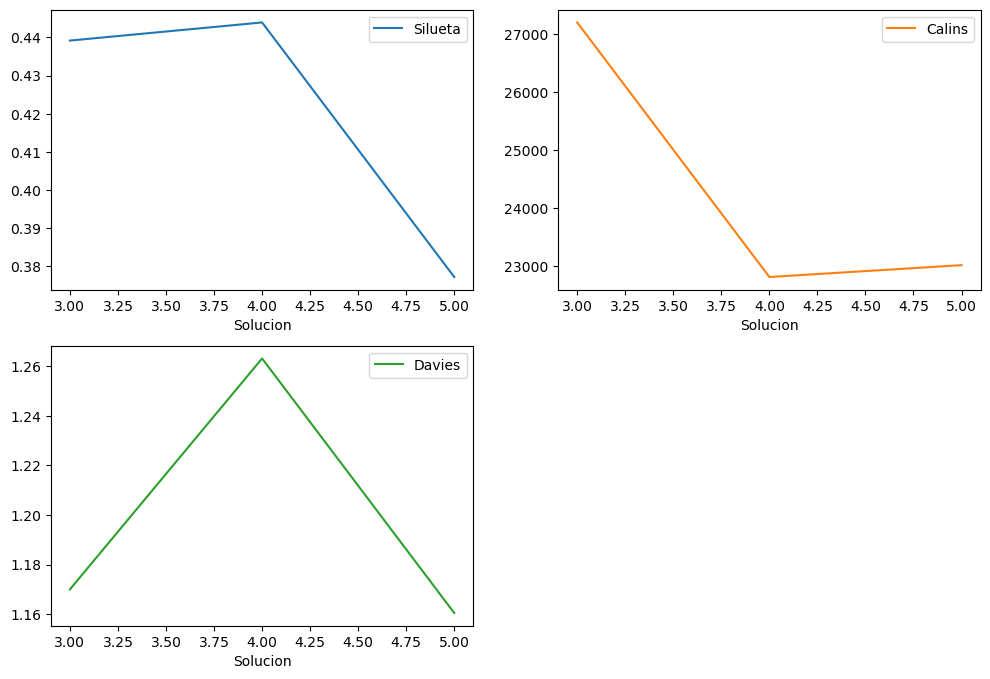

In [268]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

## Elijo la mejor solución:

In [272]:
mejor_solucion = 4

#Instanciar
cluster = MiniBatchKMeans(n_clusters = mejor_solucion, n_init=10, verbose=3)
    
#Entrenar
cluster.fit(df_final)

C:\Users\110927\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Init 1/10 with method k-means++
Inertia for init 1/10: 6965.3973640603845
Init 2/10 with method k-means++
Inertia for init 2/10: 5883.045281435417
Init 3/10 with method k-means++
Inertia for init 3/10: 6228.8720331430795
Init 4/10 with method k-means++
Inertia for init 4/10: 6684.817431761835
Init 5/10 with method k-means++
Inertia for init 5/10: 7462.392772635373
Init 6/10 with method k-means++
Inertia for init 6/10: 5060.111829095527
Init 7/10 with method k-means++
Inertia for init 7/10: 5824.016635941524
Init 8/10 with method k-means++
Inertia for init 8/10: 7902.980400855246
Init 9/10 with method k-means++
Inertia for init 9/10: 5053.523177525647
Init 10/10 with method k-means++
Inertia for init 10/10: 5227.643588720683
Minibatch step 1/5186: mean batch inertia: 1.673393973548743
Minibatch step 2/5186: mean batch inertia: 1.4077158745744365, ewa inertia: 1.4077158745744365
Minibatch step 3/5186: mean batch inertia: 1.3279651694374954, ewa inertia: 1.4046403380226258
Minibatch step 

MiniBatchKMeans(n_clusters=4, n_init=10, verbose=3)

## Representación gráfica de la mejor solución

In [273]:
df_final['segmento4'] = cluster.predict(df_final)

C:\Users\110927\AppData\Local\Temp\ipykernel_32032\4262928315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['segmento4'] = cluster.predict(df_final)


In [277]:
df_final.groupby('segmento4').mean().T \
    .style.highlight_max(color = 'green', axis = 1) \
    .highlight_min(color = 'red', axis = 1)



segmento4,0,1,2,3
weekend,0.243670,0.271699,0.252570,0.281757
source_(direct),0.999351,0.000000,0.999688,0.000000
source_OTROS,0.000433,0.031259,0.000104,0.382087
source_google,0.000216,0.968741,0.000208,0.000000
source_youtube.com,0.000000,0.000000,0.000000,0.617913
medium_(none),0.999351,0.000080,0.999896,0.000000
medium_OTROS,0.000649,0.027808,0.000104,0.083034
medium_organic,0.000000,0.972112,0.000000,0.000000
medium_referral,0.000000,0.000000,0.000000,0.916966
channelGrouping_Direct,0.665224,0.000000,0.712223,0.000072


# Conclusiones

A primera vista concuerdan los altos valores en Revenue, con las visitas, los clicks, y el número de transacciones. Que se producen en dias de diario. Y que viene por tráfico directo.

Lo cual puede ser una indicación de que haya que invertir menos en anuncios de google, por ejemplo. Parece que la mayoría de los clientes son hábituales y se les capta por otros medios. 

También es verdad que esto es un análisis muy básico y que habría que mirarlo más en profundidad para confirmarlo.

Este resultado es solo una demostración de cómo hacerlo, para llegar a resultados más eficientes es necesario dedicarle más tiempo, ajustar qué variables entran, cuales no, ajustar el Kmeans...etc.


In [293]:
df_final.to_pickle(path+'df_final.pickle')